<a href="https://colab.research.google.com/github/KwonYN/TIL/blob/master/PYTHON/TENSORFLOW/Ch3_%EC%98%88%EC%A0%9C_18_MNIST_SLP_Layer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Chapter3-5. Deep Learning 기초 : Multi Layer Perceptron (MLP)

>## [예제3-17] MNIST Classification : SLP

>### Load modules

In [1]:
%tensorflow_version 1.x

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist

print("Module Loaded.")
print("NumPy Version :{}".format(np.__version__))
print("TensorFlow Version :{}".format(tf.__version__))
print("Matplotlib Version :{}".format(plt.matplotlib.__version__))

Module Loaded.
NumPy Version :1.17.4
TensorFlow Version :1.15.0
Matplotlib Version :3.1.1


> ### Load MNIST Data

In [2]:
(train_data, train_labels), (test_data, test_labels) = mnist.load_data()

train_data = train_data.astype(np.float32)
train_data = train_data / 255.0

test_data = test_data.astype(np.float32)
test_data = test_data / 255.0

train_labels = train_labels.reshape((-1, 1))
test_labels = test_labels.reshape((-1, 1))

11493376/11490434 [==============================] - 0s 0us/step


> ### Placeholder

In [0]:
x_ph = tf.placeholder(tf.float32, shape=(None, 28, 28), name = "input")
labels_ph = tf.placeholder(tf.int32, shape=(None,1), name="labels")

>### Hypothesis, Cost, Optimizer


In [4]:
categories = 10
learning_rate = 0.001

x_flatten = tf.layers.flatten(x_ph) # (?, 28, 28) -> (?, 784)
logits = tf.layers.dense(x_flatten, categories, kernel_initializer=tf.random_normal_initializer, bias_initializer=tf.random_normal_initializer) # tf.matmul(x_ph, w) + b
hypothesis = tf.nn.softmax(logits)

labels_oh = tf.one_hot(labels_ph, categories)
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(labels_oh, logits))
optimizer = tf.train.GradientDescentOptimizer(learning_rate)
train = optimizer.minimize(cost)

Instructions for updating:
Use keras.layers.flatten instead.
Instructions for updating:
Please use `layer.__call__` method instead.
Instructions for updating:
Use keras.layers.Dense instead.


>### Mini-Batch 관련

In [0]:
N_epoch = 1000
batch_size = 100
train_data_size = train_data.shape
batch_count = train_data_size[0] //batch_size

>### Accuracy

In [0]:
def Accuracy(y:np.ndarray, t:np.ndarray)->np.float32:
    return np.mean(np.equal(np.argmax(y, axis=1).reshape((-1, 1)),t).astype(np.float32))

>### 결과 출력을 위한 함수

In [0]:
def Make_Result_Plot(suptitle:str, data:np.ndarray, label:np.ndarray, y_max:np.ndarray):
    fig_result, ax_result = plt.subplots(2,5,figsize=(18, 7))
    fig_result.suptitle(suptitle)
    for idx in range(10):
        ax_result[idx//5][idx%5].imshow(data[idx].reshape((28,28)),cmap="binary")
        ax_result[idx//5][idx%5].set_title("test_data[{}] (label : {} / y : {})".format(idx, label[idx], y_max[idx]))

> ### Training 준비

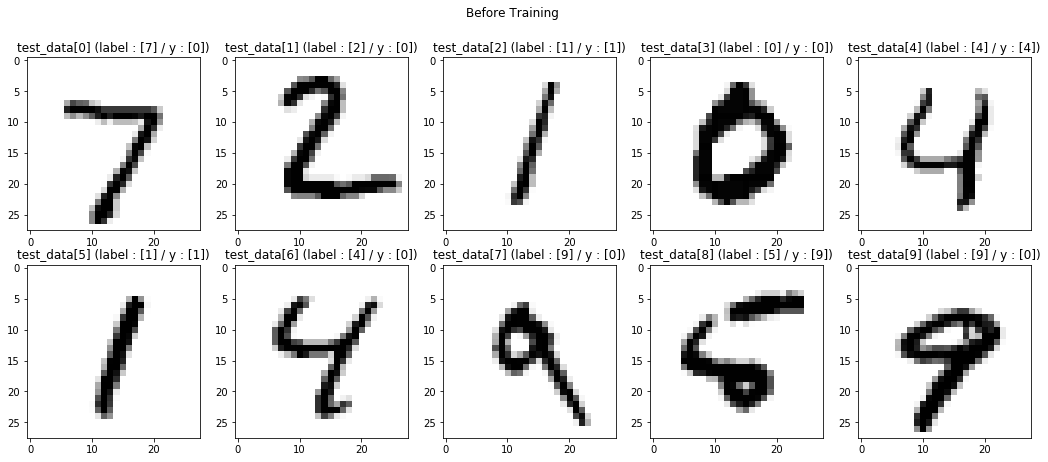

In [8]:
arr_epoch = []
arr_accu = []

# 학습 (Training)
sess = tf.Session()
sess.run(tf.global_variables_initializer())

train_data_idx = np.arange(train_data_size[0])

y_out = sess.run(hypothesis, feed_dict={x_ph: test_data})
y_max = np.argmax(y_out, axis=1).reshape((-1, 1))
Make_Result_Plot("Before Training", test_data, test_labels, y_max)

accu = Accuracy(y_out,test_labels)
arr_epoch.append(0)
arr_accu.append(accu)

> ### 학습 (Training)

In [9]:
%%time
for epoch_idx in range(1, N_epoch+1):
    np.random.shuffle(train_data_idx)
    for batch_idx in range(batch_count):
        batch_data = np.array([train_data[train_data_idx[idx]] for idx in range(batch_size)])
        batch_labels = np.array([train_labels[train_data_idx[idx]] for idx in range(batch_size)])
        sess.run(train, feed_dict={x_ph: batch_data, labels_ph: batch_labels})
    if epoch_idx%1 == 0:
        y_out = sess.run(hypothesis, feed_dict={x_ph: test_data})
        accu = Accuracy(y_out,test_labels)
        print("[{:>5}] accuracy = {:>10.4}".format(epoch_idx,accu))
        arr_epoch.append(epoch_idx)
        arr_accu.append(accu)

[    1] accuracy =     0.1474
[    2] accuracy =     0.1746
[    3] accuracy =     0.2054
[    4] accuracy =     0.2223
[    5] accuracy =     0.2404
[    6] accuracy =     0.2601
[    7] accuracy =     0.2887
[    8] accuracy =     0.3083
[    9] accuracy =     0.3345
[   10] accuracy =     0.3483
[   11] accuracy =     0.3653
[   12] accuracy =     0.3851
[   13] accuracy =     0.4019
[   14] accuracy =     0.4104
[   15] accuracy =     0.4277
[   16] accuracy =     0.4398
[   17] accuracy =     0.4552
[   18] accuracy =      0.471
[   19] accuracy =     0.4838
[   20] accuracy =     0.4929
[   21] accuracy =     0.5042
[   22] accuracy =     0.5106
[   23] accuracy =     0.5162
[   24] accuracy =     0.5225
[   25] accuracy =     0.5393
[   26] accuracy =      0.546
[   27] accuracy =     0.5595
[   28] accuracy =     0.5667
[   29] accuracy =     0.5757
[   30] accuracy =      0.576
[   31] accuracy =     0.5816
[   32] accuracy =     0.5909
[   33] accuracy =     0.5971
[   34] ac

KeyboardInterrupt: ignored

> ### Ploting : Cost/Training Count

In [0]:
# Plot : Accuracy / Epoch
fig_accu, ax_accu = plt.subplots()
ax_accu.plot(arr_epoch, arr_accu)
ax_accu.set_title("Accuracy / Epoch (SLP)")
ax_accu.grid(True)
ax_accu.set_ylim(0,1.1)

> ### Training 이후

In [0]:
y_out = sess.run(hypothesis, feed_dict={x_ph: test_data})
y_max = np.argmax(y_out, axis=1).reshape((-1, 1))
Make_Result_Plot("After Training", test_data, test_labels, y_max)